# Region Proposal(영역 추정): Selective Search

### Object Detection에서 Region Proposal을 해야 하는 이유
- Region Proposal: 주어진 이미지에서 object가 있을 만한 위치를 찾는 것
- Object Loclization처럼 bounding box Regression만 추가해서는 inference 자체가 어려움

### Selective Search
- Region Proposal의 대표적인 방법
- 밝기, 색상, 무늬, 크기, 형태 등에 따라 **유사한 Region을 계층적 그룹핑 방법으로 계산**하는 알고리즘

### [Selective Search](https://github.com/AlpacaTechJP/selectivesearch) 설치 및 [이미지](https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/audrey01.jpg) 로드

In [9]:
!pip install selectivesearch

  Using cached selectivesearch-0.4-py3-none-any.whl


In [12]:
!mkdir ./img
!wget -O ./img/audrey01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/audrey01.jpg

--2023-08-29 08:03:41--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/audrey01.jpg
raw.githubusercontent.com (raw.githubusercontent.com) 해석 중... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
다음으로 연결 중: raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 200 OK
길이: 30102 (29K) [image/jpeg]
저장 위치: `./img/audrey01.jpg'

./img/audrey01.jpg  100%[===================>]  29.40K  --.-KB/s    /  0.003s  

2023-08-29 08:03:41 (9.58 MB/s) - `./img/audrey01.jpg' 저장함 [30102/30102]



image shape:  (450, 375, 3)


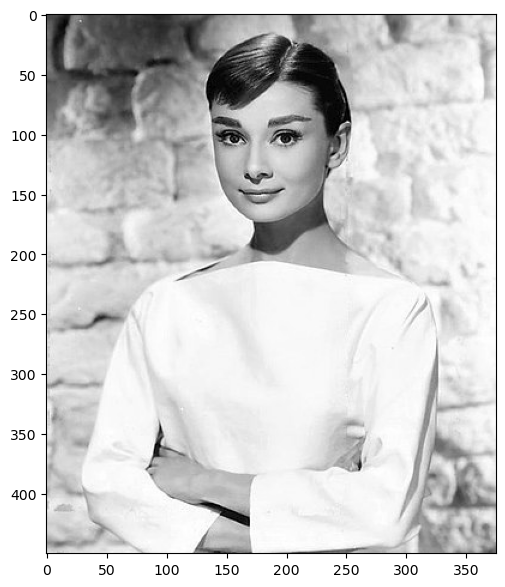

In [24]:
import cv2
import matplotlib.pyplot as plt # matplotlib은 데이터 시각화를 하기 위한 패키지
import os # OS에 의존하는 다양한 기능을 제공하는 모듈 ex. 파일 및 디렉토리 조작, 파일의 목록 및 경로 획득, ...
# %matplotlib liline # 코드를 실행한 해당 브라우저에서 바로 볼 수 있게 해줌, 주피터 노트북에서는 없어도 무관

img = cv2.imread('./img/audrey01.jpg') # openCV는 컬러사진을 BGR 순서로 저장
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # matplotlib는 RGB 순서로 저장 -> plt을 이용하기 위해서는 RGB로 변환 필요
print('image shape: ', img.shape) # (height, weidth, channel)

plt.figure(figsize=(7, 7)) # 새로운 figure 생성 or 기존의 figure 활성화
plt.imshow(img_rgb) # 데이터를 이미지로 표현
plt.show() # 열려있는 모든 Figure 표시

### Selective Search 방식으로 후보 영역 추출 및 시각화
**후보 영역 추출**

*selectivesearch.selective_search(img, ...): 이미지의 Region Proposal 정보 반환*
- scale: 주로 찾을 object의 크기, 클 수록 큰 object 위주로 작을 수록 작은 object 위주로 찾음 
- min_size: object 크기의 최소값
- return  
    : 뒤로 갈 수록 너비와 높이 값이 큰 bounding box -> bbox 내에 여러 개의 object가 있을 확률 높아짐
    - rect: bounding box (좌상단 x 좌표(x min), 좌상단 y 좌표(y min), width, height)
    - size: segment로 select된 object의 크기, bounding box 내의 object의 크기 (bounding box의 크기 >= size)
    - labels: bounding box 내 oject의 고유 ID

In [34]:
import selectivesearch

_, regions = selectivesearch.selective_search(img_rgb, scale=100, min_size=2000)

print(type(regions), len(regions))
regions

<class 'list'> 41


[{'rect': (0, 0, 107, 167), 'size': 11166, 'labels': [0.0]},
 {'rect': (15, 0, 129, 110), 'size': 8771, 'labels': [1.0]},
 {'rect': (121, 0, 253, 133), 'size': 17442, 'labels': [2.0]},
 {'rect': (134, 17, 73, 62), 'size': 2713, 'labels': [3.0]},
 {'rect': (166, 23, 87, 176), 'size': 8639, 'labels': [4.0]},
 {'rect': (136, 53, 88, 121), 'size': 4617, 'labels': [5.0]},
 {'rect': (232, 79, 117, 147), 'size': 7701, 'labels': [6.0]},
 {'rect': (50, 91, 133, 123), 'size': 7042, 'labels': [7.0]},
 {'rect': (305, 97, 69, 283), 'size': 11373, 'labels': [8.0]},
 {'rect': (0, 161, 70, 46), 'size': 2363, 'labels': [9.0]},
 {'rect': (72, 171, 252, 222), 'size': 34467, 'labels': [10.0]},
 {'rect': (0, 181, 118, 85), 'size': 5270, 'labels': [11.0]},
 {'rect': (106, 210, 89, 101), 'size': 2868, 'labels': [12.0]},
 {'rect': (302, 228, 66, 96), 'size': 2531, 'labels': [13.0]},
 {'rect': (0, 253, 92, 134), 'size': 7207, 'labels': [14.0]},
 {'rect': (153, 270, 173, 179), 'size': 10360, 'labels': [15.0]},


In [36]:
# regions에서 rect 정보만 추출
cand_rects = [cand['rect'] for cand in regions]
cand_rects

[(0, 0, 107, 167),
 (15, 0, 129, 110),
 (121, 0, 253, 133),
 (134, 17, 73, 62),
 (166, 23, 87, 176),
 (136, 53, 88, 121),
 (232, 79, 117, 147),
 (50, 91, 133, 123),
 (305, 97, 69, 283),
 (0, 161, 70, 46),
 (72, 171, 252, 222),
 (0, 181, 118, 85),
 (106, 210, 89, 101),
 (302, 228, 66, 96),
 (0, 253, 92, 134),
 (153, 270, 173, 179),
 (0, 305, 47, 139),
 (104, 312, 80, 71),
 (84, 360, 91, 67),
 (0, 362, 171, 87),
 (297, 364, 77, 85),
 (0, 91, 183, 175),
 (136, 23, 117, 176),
 (72, 171, 254, 278),
 (134, 17, 119, 182),
 (302, 97, 72, 283),
 (121, 0, 253, 226),
 (0, 91, 183, 175),
 (0, 0, 144, 167),
 (0, 0, 253, 199),
 (0, 253, 92, 191),
 (0, 91, 183, 353),
 (0, 171, 326, 278),
 (0, 97, 374, 352),
 (84, 312, 100, 115),
 (0, 91, 184, 353),
 (0, 91, 195, 353),
 (0, 0, 374, 444),
 (0, 0, 374, 449),
 (0, 0, 374, 449),
 (0, 0, 374, 449)]

**bounding box 시각화**  

*cv2.rectangle(img, 시작점 좌표(x,y), 종료점 좌표(x,y)): 사각형을 그리는 함수*
- color: 색상으로 각각은 0~255 사이의 값 가짐 (B, G, R)
- thickness: 선 두께 (default = 1)
- lineType: 선 종류 (default = cv2.Line_8)

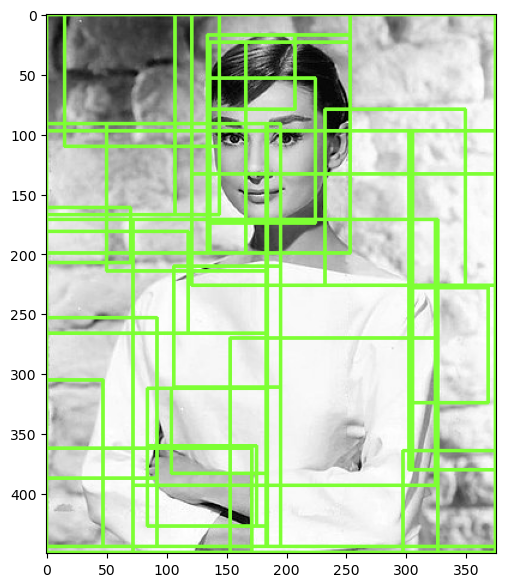

In [38]:
green_rgb = (125, 255, 51)
img_rgb_copy = img_rgb.copy() # 기존의 원본 이미지(img_rgb)에 영향이 가지 않도록 함, img_rgb와 img_rgb_copy는 독립적인 주소를 가짐
for rect in cand_rects:
    
    # bounding box의 꼭짓점 중 좌상단과 우하단의 좌표 구하기
    # rect = [좌상단 x 좌표, 좌상단 y 좌표, width, height]
    left = rect[0]
    top = rect[1]
    right = left + rect[2]
    bottom = top + rect[3]
    
    # 좌상단 및 우하단 좌표를 바탕으로 사각형 그리기
    cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color=green_rgb, thickness=2)
    
plt.figure(figsize=(7, 7))
plt.imshow(img_rgb_copy)
plt.show()

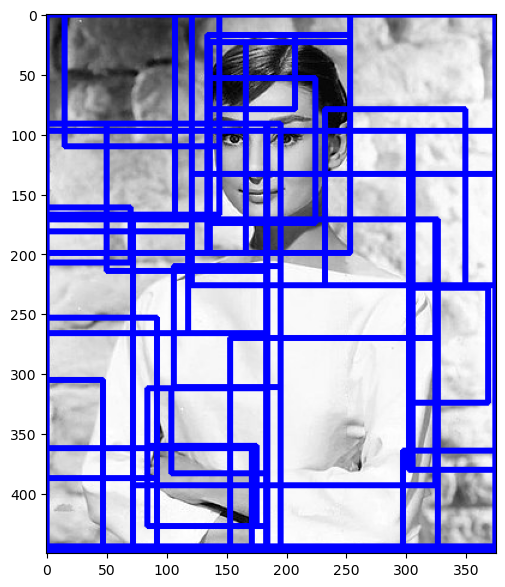

In [43]:
# bounding box 내의 object의 크기가 1000 이상인 bbox만 나타내기
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 1000]

blue_rgb = (0, 0, 255)
img_rgb_copy = img_rgb.copy()
for rect in cand_rects:
    
    left = rect[0]
    top = rect[1]
    right = left + rect[2]
    bottom = top + rect[3]
    
    img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color=blue_rgb, thickness=4)

plt.figure(figsize=(7, 7))
plt.imshow(img_rgb_copy)
plt.show()

> matplotlib가 아닌 cv2의 함수로 figure 출력 시, **bounding box의 색상은 빨간색**  
> ```python
> # cv2.imshow('image', img_rgb_copy)
> # cv2.waitKey(0)
> # cv2.destroyAllWindows()
> ````
>   
> - openCV는 이미지 저장 시 (B, G, R) 순서로, matplotlib은 이미지 저장 시 (R, G, B) 순서로 저장
> - `cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), (0, 0, 255), thickness=4)`
>     - img_rgb_copy에 그려진 bounding box의 색상 정보는 red (b=0, g=0, r=255)>
>     - 따라서 openCV 내의 함수로 figure을 출력하면 bounding box의 색상은 red
>     - 반면 matplotlib 내의 함수로 출력시 bounding box의 색상 정보는 blue (r=0, g=0, b=255)